# PyTorch Introduction

In this recitation we will be using PyTorch to train a perceptron to classify images in the CIFAR 10 dataset!

## Imports
* numpy: for vectorized operations
* matplotlib: for visualization 
* torch: (PyTorch) for backpropagation and training our network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
''' PyTorch Libraries '''
import torch

## PyTorch & Tensors
Tensors are like nd_arrays. They can do fast vectorized operations.

In [6]:
my_list   = [1, 2, 3]
my_array  = np.array([1, 2, 3])
my_tensor = torch.Tensor([1, 2, 3])

In [29]:
my_tensor.

In [ ]:
''' declaring a Tensor '''

In [30]:
x = torch.Tensor(3, 5)
print(x)

tensor([[ 0.0000e+00,  0.0000e+00,  2.0381e-19,  4.5842e-41, -2.2132e+30],
        [ 4.5841e-41,  1.5209e-38,  0.0000e+00,  1.5209e-38,  0.0000e+00],
        [ 8.5426e-37,  4.5842e-41,  8.5426e-37,  4.5842e-41,  8.5426e-37]])


In [31]:
x = torch.ones(3, 5)
print(x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [39]:
y = torch.rand(3, 5)
print(y)

tensor([[0.4589, 0.5435, 0.8756, 0.6488, 0.3713],
        [0.1777, 0.3942, 0.0119, 0.7289, 0.7103],
        [0.3052, 0.3986, 0.1414, 0.6148, 0.7113]])


In [41]:
z = x + y
print(z)

tensor([[1.4589, 1.5435, 1.8756, 1.6488, 1.3713],
        [1.1777, 1.3942, 1.0119, 1.7289, 1.7103],
        [1.3052, 1.3986, 1.1414, 1.6148, 1.7113]])


In [42]:
x.add_(y)

tensor([[1.4589, 1.5435, 1.8756, 1.6488, 1.3713],
        [1.1777, 1.3942, 1.0119, 1.7289, 1.7103],
        [1.3052, 1.3986, 1.1414, 1.6148, 1.7113]])

In [43]:
print(x)

tensor([[1.4589, 1.5435, 1.8756, 1.6488, 1.3713],
        [1.1777, 1.3942, 1.0119, 1.7289, 1.7103],
        [1.3052, 1.3986, 1.1414, 1.6148, 1.7113]])


In [51]:
''' Torch Matrix Multiplication '''
xTy = torch.mm(x.t(), y)
print(xTy)
print(xTy.shape)

tensor([[1.2770, 1.7773, 1.4759, 2.6073, 2.3065],
        [1.3828, 1.9458, 1.5657, 2.8775, 2.5582],
        [1.3888, 1.8731, 1.8156, 2.6561, 2.2270],
        [1.5566, 2.2212, 1.6924, 3.3227, 2.9889],
        [1.4554, 2.1015, 1.4629, 3.1885, 2.9412]])
torch.Size([5, 5])


In [35]:
x.size()

torch.Size([3, 5])

## PyTorch & Variables
PyTorch Variables are used for backpropogation. 

In [2]:
import torch.nn as nn
from torch.autograd import Variable

In Homework 1, we talked about a spring whose coefficients were close to [1, 5, 10]. We'll do a simple example "learning" the coefficients with gradient descent.

In [291]:
# our current estimate of the coefficients. 
w = Variable(torch.Tensor([1, 5, 10]), requires_grad=True)
# the true values of the coefficients. After updating w, we want it to equal w_true
w_true = torch.Tensor([1.1, 5.0001, 12.5])

In [375]:
ws = []
grads = []

lr = 0.1
w = Variable(torch.Tensor([1, 5, 10]), requires_grad=True)
w_true = torch.Tensor([1.1, 4.0001, 12.5])

for _ in range(50):
    ws.append(w.data.numpy())
    error = torch.sum((w_true - w)**2)
    error.backward()
    grads.append(w.grad.numpy())
    w.data = w.data - 1*lr*w.grad
    w.grad = None

In [376]:
Ws    = np.array(ws)
Grads = np.array(grads)

In [1]:
%matplotlib notebook
''' plot for the first dimension of w '''
fig = plt.figure()

plt.plot(Ws[:, 0], c='g', label='w')
plt.plot([0, 49], [w_true[0], w_true[0]], 'g--', label='w true')

plt.plot(Grads[:, 0], label= 'gradient')

plt.title('w[0]')
plt.xlabel('Iteration')
plt.legend()
plt.show()

In [2]:
''' plot for the second dimension of w '''
fig = plt.figure()

plt.plot(Ws[:, 1], c='r')
plt.plot([0, 49], [w_true[1], w_true[1]], 'r--')

plt.plot(Grads[:, 1])

plt.show()

In [3]:
''' plot for the third dimension of w '''
fig = plt.figure()

plt.plot(Ws[:, 2], c='m')
plt.plot([0, 49], [w_true[2], w_true[2]], 'm--')

plt.plot(Grads[:, 2])

plt.show()

In [278]:
loss = criterion(w, w_true)

In [280]:
loss.backward()


## *** Remember *** 
* when you want to access the data of your Variable, use <b>variable.data</b>. Otherwise you will construct a computation graph

## CIFAR 10 Dataset
As a fun example, we're going to look at training a perceptron to classify images into 10 classes: plane, car, bird, cat, deer, dog, frog, horse, ship and truck. 
<br><br>
See the PyTorch tutorial here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [3]:
import torchvision
import torchvision.transforms as transforms

<i> You don't need to worry about what is happening in this block, basically we are downloading training and testing data and normalizing the data. </i>

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Visualizing the data

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

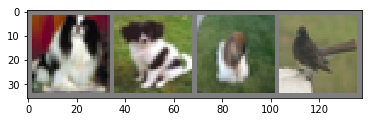

  dog	 	  dog	 	  dog	 	 bird


In [6]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('\t \t'.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
images.shape

torch.Size([4, 3, 32, 32])

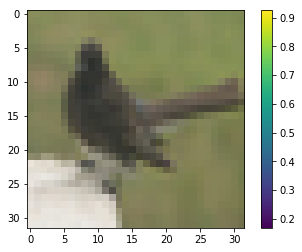

In [8]:
img = images / 2 + 0.5     # unnormalize
npimg = img.numpy()
fig = plt.figure()
plt.imshow(np.transpose(npimg[3,:,:,:], (1, 2, 0)))
plt.colorbar()
plt.show()

## Building a Perceptron 
i.e. a one-layer Neural Network <br> 
Images: 32x32 pixels x 3 color channels = 3072 input features <br> 
Output: 1x10 class prediction

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        return x
    
    def predict(self, x):
        return torch.argmax(self.forward(x), dim=1)


In [14]:
model = Perceptron()

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [16]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        flat_inputs = inputs.reshape(4, -1)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(flat_inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
        del data, inputs, labels, flat_inputs

print('Finished Training')

[1,  2000] loss: 2.216
[1,  4000] loss: 2.184
[1,  6000] loss: 2.117
[1,  8000] loss: 2.088
[1, 10000] loss: 2.160
[1, 12000] loss: 2.171
[2,  2000] loss: 2.073
[2,  4000] loss: 2.078
[2,  6000] loss: 2.107
[2,  8000] loss: 2.108
[2, 10000] loss: 2.129
[2, 12000] loss: 2.112
Finished Training


In [17]:
''' Compute the Test Accuracy '''
True_Labels = []
Predicted_Labels = []

for data in testloader:
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    flat_inputs = inputs.reshape(4, -1)

    # forward + backward + optimize
    outputs = model.predict(flat_inputs)
    
    True_Labels.extend(list(labels))
    Predicted_Labels.extend(list(outputs))
    
    del data, inputs, labels

RuntimeError: received 0 items of ancdata

In [19]:
''' Compute the Accuracy '''
np.mean(np.array(Predicted_Labels)==np.array(True_Labels))

0.36363636363636365

## Visualize the learned weights

In [36]:
model.fc1.weight.shape

torch.Size([10, 3072])

In [4]:
for i in range(len(classes)):
    print(classes[i])
    
    weights = np.transpose(np.reshape(model.fc1.weight.data.numpy()[i, :], (3, 32, 32)), (1, 2, 0))
    weights_norm = (weights - np.min(weights))/(np.max(weights) - np.min(weights))
    
    fig = plt.figure()
    plt.imshow(weights_norm)
    plt.show()

## See https://ml4a.github.io/ml4a/looking_inside_neural_nets/ for more cool visualizations!